<a href="https://colab.research.google.com/github/RuneBuckinx/DSNLAssignment/blob/main/DSNL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> Data Science for Non Life Insurance
</h1></center>
<center> <h2> Assignment </h2> </center>


#Table of Contents

* [Section 1: Exploration](#one)
    + [1.1 Libraries](#one-one)
    + [1.2 Data](#one-two)
    + 

#Section 1: Exploration <a name="one"> </a>

## 1.1 Libraries <a name = "one-one"> </a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd
!pip install mapclassify
import xgboost as xgb

If any of the above packages cannot be imported, add the following line of code to the code above.

```
!pip install packagename
```



## 1.2 Data <a name = "one-two"> </a>

We first import the assignment data. To run this Colab add the files in the zipfile added to the assignment to the content folder. The *inspost.csv* file contains the latitude and longitude for all postal codes, we merge it with our data by using the merge function from pandas. By specifying *how = 'left'* we make sure to only add the postal code info to existing rows.



In [14]:
data = pd.read_csv("Assignment.csv")
latlong = pd.read_csv("inspost.csv")
data = pd.merge(data,latlong, on='CODPOSS', how='left')
data.head()

ParserError: ignored

We start by looking at the claim counts, we see that most of the insured have no accidents, and that having more than three accidents is relatively rare. Note that these numbers are not adjusted to the fact that not everyone is exposed for a full year.

0    145312
1     16602
2      1562
3       162
4        17
5         2
Name: nbrtotc, dtype: int64

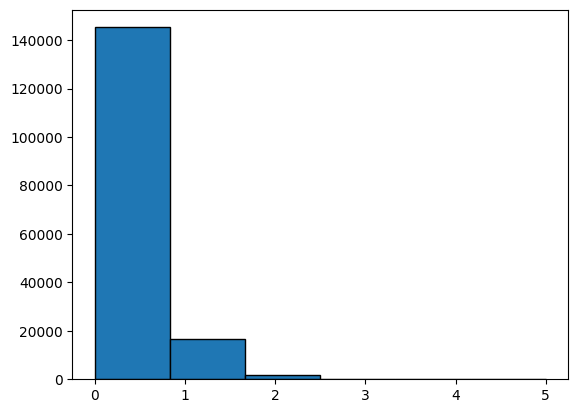

In [ ]:
plt.hist(data['nbrtotc'], bins = 6, edgecolor = 'black')
data['nbrtotc'].value_counts()

We now compute some totals that can later be used as sanity checks in the construction of a tariff plan.

In [4]:
TotalExp = data['duree'].sum()
TotalLoss = data['chargtot'].sum()
TotalClaims = data['nbrtotc'].sum()
lossPerClaim = TotalLoss/TotalClaims
print(TotalLoss, lossPerClaim)

32911481.75869593 1622.0543005764382


We now explore the relative exposure for different categories within our dataset. We do this by grouping the data by a certain column and adding the total exposure for each value appearing in said column. We devide by the total exposure of the dataset, and find the relative exposure.

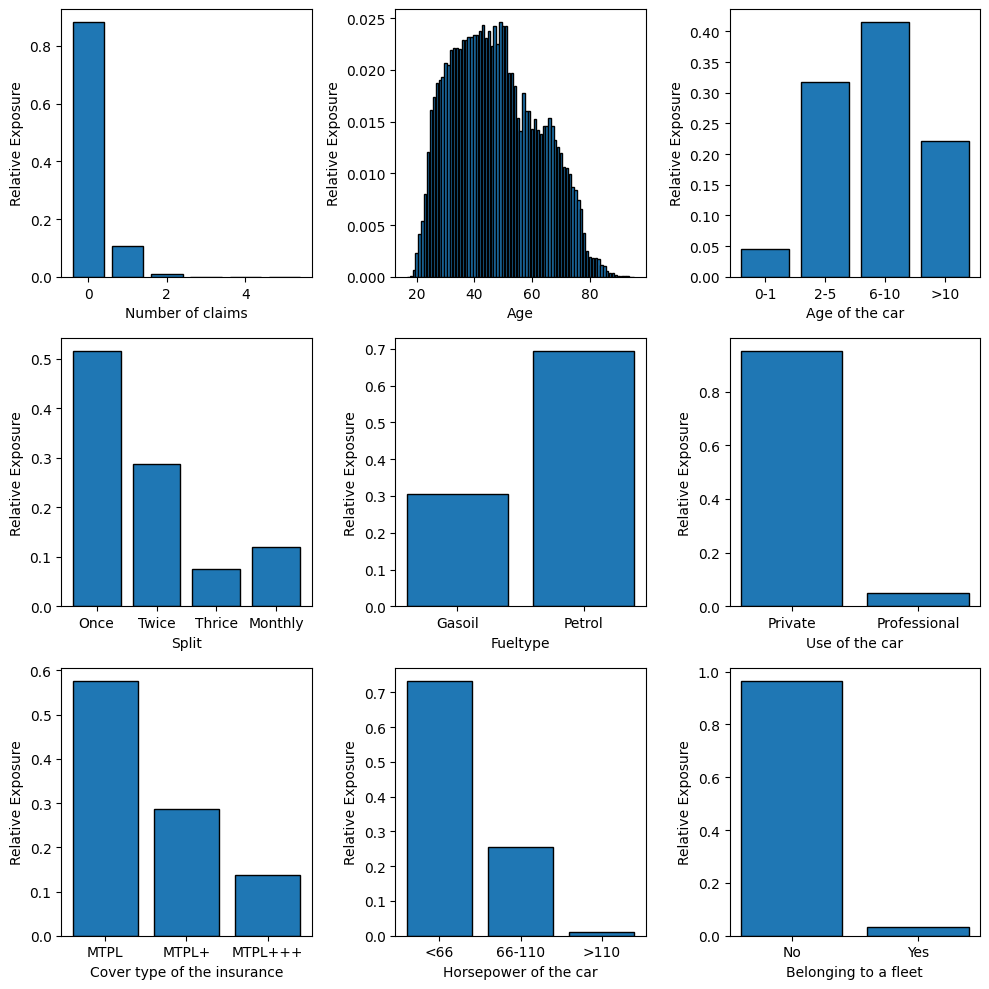

In [11]:
reldatanbracc = data.groupby('nbrtotc')['duree'].sum().div(TotalExp)
fleetexp = data.groupby('fleetc')['duree'].sum().div(TotalExp)
ageexp = data.groupby('AGEPH')['duree'].sum().div(TotalExp)

agecarexp = data.groupby('agecar')['duree'].sum().div(TotalExp)
fuelcexp = data.groupby('fuelc')['duree'].sum().div(TotalExp)
usecexp = data.groupby('usec')['duree'].sum().div(TotalExp)
coverpexp = data.groupby('coverp')['duree'].sum().div(TotalExp)

orderhp = ['<66', '66-110', '>110']
powercexp = data.groupby('powerc')['duree'].sum().div(TotalExp)

splitexp = data.groupby('split')['duree'].sum().div(TotalExp)

bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
relexp = data.groupby(pd.cut(data['duree'], bins=bins))['duree'].sum().div(TotalExp)

fig, axs = plt.subplots(3,3, figsize = (10,10))
axs[0,0].bar(reldatanbracc.index, reldatanbracc, edgecolor = 'black')
axs[0,0].set_xlabel('Number of claims')
axs[0,0].set_ylabel('Relative Exposure')

axs[1,0].bar(splitexp.reindex(["Once", "Twice", "Thrice", "Monthly"]).index, splitexp.reindex(["Once", "Twice", "Thrice", "Monthly"]), edgecolor = 'black')
axs[1,0].set_xlabel('Split')
axs[1,0].set_ylabel('Relative Exposure')

axs[2,2].bar(fleetexp.index, fleetexp, edgecolor = 'black')
axs[2,2].set_xlabel('Belonging to a fleet')
axs[2,2].set_ylabel('Relative Exposure')

axs[0,1].bar(ageexp.index, ageexp, edgecolor = 'black')
axs[0,1].set_xlabel('Age')
axs[0,1].set_ylabel('Relative Exposure')

axs[0,2].bar(agecarexp.index, agecarexp, edgecolor = 'black')
axs[0,2].set_xlabel('Age of the car')
axs[0,2].set_ylabel('Relative Exposure')

axs[1,1].bar(fuelcexp.index, fuelcexp, edgecolor = 'black')
axs[1,1].set_xlabel('Fueltype')
axs[1,1].set_ylabel('Relative Exposure')

axs[1,2].bar(usecexp.index, usecexp, edgecolor = 'black')
axs[1,2].set_xlabel('Use of the car')
axs[1,2].set_ylabel('Relative Exposure')

axs[2,0].bar(coverpexp.index, coverpexp, edgecolor = 'black')
axs[2,0].set_xlabel('Cover type of the insurance')
axs[2,0].set_ylabel('Relative Exposure')

axs[2,1].bar(powercexp.reindex(["<66", "66-110", ">110"]).index, powercexp.reindex(["<66", "66-110", ">110"]), edgecolor = 'black')
axs[2,1].set_xlabel('Horsepower of the car')
axs[2,1].set_ylabel('Relative Exposure')

#axs[1,0].bar(fleetexp.index, fleetexp, edgecolor = 'black')
#axs[1,0].set_xlabel('Belonging to a Fleet')
#axs[1,0].set_ylabel('Relative Exposure')
plt.tight_layout()

In [9]:
powercexp.reindex(["<66", "66-110", ">110"])

powerc
<66       0.733739
66-110    0.256422
>110      0.009839
Name: duree, dtype: float64

In [ ]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
relexp = data.groupby(pd.cut(data['duree'], bins=bins))['duree'].sum().div(TotalExp)
relexp
#plt.bar(relexp, bins = 10, edgecolor = 'black')
#plt.xlabel('Number of claims')
#plt.ylabel('Relative Exposure')
#NOG NAAR KIJKEN

duree
(0.0, 0.1]    0.001330
(0.1, 0.2]    0.003532
(0.2, 0.3]    0.006279
(0.3, 0.4]    0.008480
(0.4, 0.5]    0.012725
(0.5, 0.6]    0.014569
(0.6, 0.7]    0.015263
(0.7, 0.8]    0.020977
(0.8, 0.9]    0.023440
(0.9, 1.0]    0.893399
Name: duree, dtype: float64

Exposure for different Postal Codes

In [ ]:
!pip install geopandas

Import shapefile of Belgian Postalcodes.

In [ ]:
import geopandas as gpd
#shape=gpd.read_file('postaldistricts.shp')
shape=gpd.read_file('communes_L08.shp')
#shape=gpd.read_file('npc96_region_Project1.shp')
shape['INS'] = shape['NSI']

In [ ]:
shape.head()

,Name,NSI,geometry,INS
0,Aartselaar,11001,"POLYGON ((652182.591 704480.416, 652178.267 70...",11001
1,Antwerpen,11002,"POLYGON ((649863.240 727423.314, 649391.917 72...",11002
2,Boechout,11004,"POLYGON ((661185.159 708967.442, 661195.898 70...",11004
3,Boom,11005,"POLYGON ((651079.098 696759.576, 651012.626 69...",11005
4,Borsbeek,11007,"POLYGON ((659697.241 708876.389, 659693.637 70...",11007


In [ ]:
shape = shape.merge(latlong, on = 'INS', how= 'left')

In [ ]:
shape.head()

,Name,NSI,geometry,INS,COMMUNE,LAT,LONG,CODPOSS
0,Aartselaar,11001,"POLYGON ((652182.591 704480.416, 652178.267 70...",11001,AARTSELAAR,51.133333,4.383333,2630
1,Antwerpen,11002,"POLYGON ((649863.240 727423.314, 649391.917 72...",11002,ANTWERPEN,51.200000,4.400000,2000
2,Boechout,11004,"POLYGON ((661185.159 708967.442, 661195.898 70...",11004,BOECHOUT,51.000000,4.483333,2530
3,Boom,11005,"POLYGON ((651079.098 696759.576, 651012.626 69...",11005,BOOM,51.083333,4.366667,2850
4,Borsbeek,11007,"POLYGON ((659697.241 708876.389, 659693.637 70...",11007,BORSBEEK,51.183333,4.483333,2150


We now combine the data from the dataset with the geoDataFrame we have constructed by importing the shapefile. We do this by compiling all the exposure of a certain postal code, and adding it as a new column in the geoDataFrame.

In [ ]:
relExpPost = [0 for foo in shape.index]
for index, row in shape.iterrows():
  postalcode = float(row['CODPOSS'])
  df1 = data.loc[data['CODPOSS'] == postalcode]
  relExpPost[index] = len(df1.index)/TotalExp
shape['Relative_Exposure'] = relExpPost

We can now plot the relative exposure per postal code. We use the mapclassify package to be able to work with custom bins in the scale.

In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


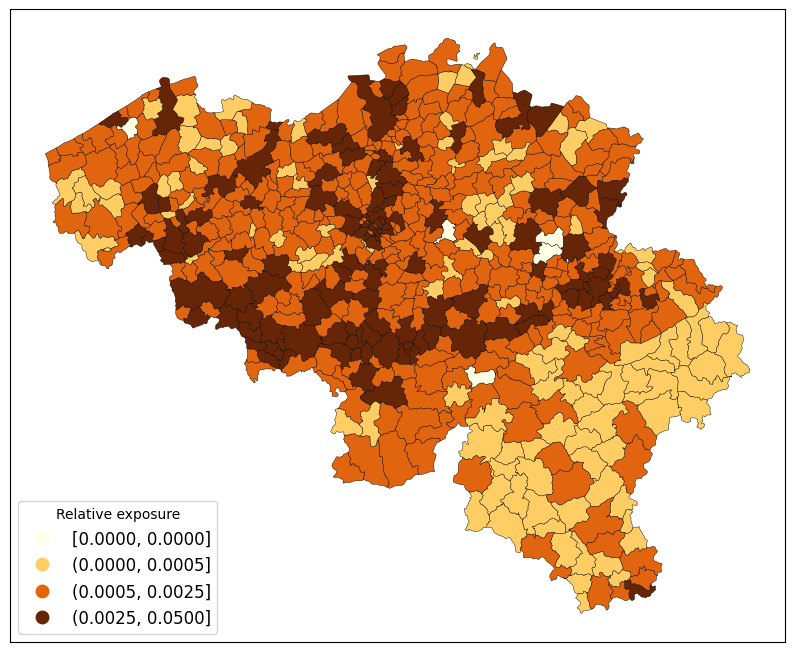

In [ ]:
#!pip install mapclassify
bins = [0,0.0005,0.0025,0.05]
ax = shape.plot(column='Relative_Exposure',
           legend = True,
           cmap = 'YlOrBr',
           scheme= 'UserDefined',
           classification_kwds={'bins': bins},
           legend_kwds= {'interval': True, 'loc':'lower left', 'title':'Relative exposure', 'fontsize':'large', 'fmt':'{:.4f}'},
           edgecolor = 'black',
           linewidth = 0.3,
           figsize = (10,10))

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

#Tariff Construction

We add two new columns in our dataset, representing the claim count per unit of exposure, and the claim size per claim

In [ ]:
data['claimperunitexp'] = data['nbrtotc']/data['duree']
data['sizeperclaim'] = data['chargtot']/data['nbrtotc']
data.head()

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,...,fleetc,sportc,coverp,powerc,INS,COMMUNE,LAT,LONG,claimperunitexp,sizeperclaim
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,...,No,No,MTPL+,66-110,21004,BRUSSEL,51.00,4.350000,0.000000,NaN
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,...,No,No,MTPL,66-110,21004,BRUSSEL,51.00,4.350000,21.470588,155.974606
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,...,No,No,MTPL,<66,21004,BRUSSEL,51.00,4.350000,0.000000,NaN
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,...,No,No,MTPL+++,66-110,21015,SCHAARBEEK,50.85,4.383333,0.000000,NaN
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,...,No,No,MTPL+,<66,21015,SCHAARBEEK,50.85,4.383333,0.000000,NaN


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
features = ['AGEPH', 'agecar', 'sexp', 'fuelc', 'split', 'usec', 'fleetc', 'sportc', 'coverp', 'powerc', 'LAT', 'LONG']
X = data[features]
y = data['claimperunitexp']
y.head()

0     0.000000
1    21.470588
2     0.000000
3     0.000000
4     0.000000
Name: claimperunitexp, dtype: float64

We create dummy variables.

In [ ]:
X = pd.get_dummies(X)
X = X.rename(columns = {'agecar_>10':'agecar_10+', 'powerc_<66' : 'powerc_66-', 'powerc_>110' : 'powerc_110+'})
list(X)

['AGEPH',
 'LAT',
 'LONG',
 'agecar_0-1',
 'agecar_2-5',
 'agecar_6-10',
 'agecar_10+',
 'sexp_Female',
 'sexp_Male',
 'fuelc_Gasoil',
 'fuelc_Petrol',
 'split_Monthly',
 'split_Once',
 'split_Thrice',
 'split_Twice',
 'usec_Private',
 'usec_Professional',
 'fleetc_No',
 'fleetc_Yes',
 'sportc_No',
 'sportc_Yes',
 'coverp_MTPL',
 'coverp_MTPL+',
 'coverp_MTPL+++',
 'powerc_66-110',
 'powerc_66-',
 'powerc_110+']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train

,AGEPH,LAT,LONG,agecar_0-1,agecar_2-5,agecar_6-10,agecar_10+,sexp_Female,sexp_Male,fuelc_Gasoil,...,fleetc_No,fleetc_Yes,sportc_No,sportc_Yes,coverp_MTPL,coverp_MTPL+,coverp_MTPL+++,powerc_66-110,powerc_66-,powerc_110+
84039,36,50.500000,3.400000,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
100756,38,50.850000,4.383333,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
135212,43,50.600000,5.316667,0,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
130331,50,50.500000,3.583333,0,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,1,0
134673,25,51.216667,2.900000,0,0,1,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97639,65,50.450000,3.933333,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
95939,51,50.016667,4.166667,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
152315,44,50.683333,4.800000,0,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,1,0
117952,45,50.516667,5.233333,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
gbm = xgb.XGBRegressor(objective='count:poisson')
gbm.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='count:poisson', predictor=None, ...)

In [ ]:
featImport = gbm.feature_importances_
featNames = gbm.feature_names_in_

<BarContainer object of 27 artists>

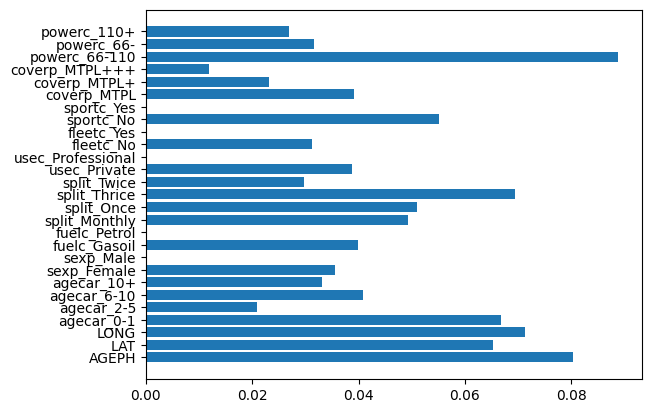

In [ ]:
fig, ax = plt.subplots()

ax.barh(featNames, featImport, align='center')

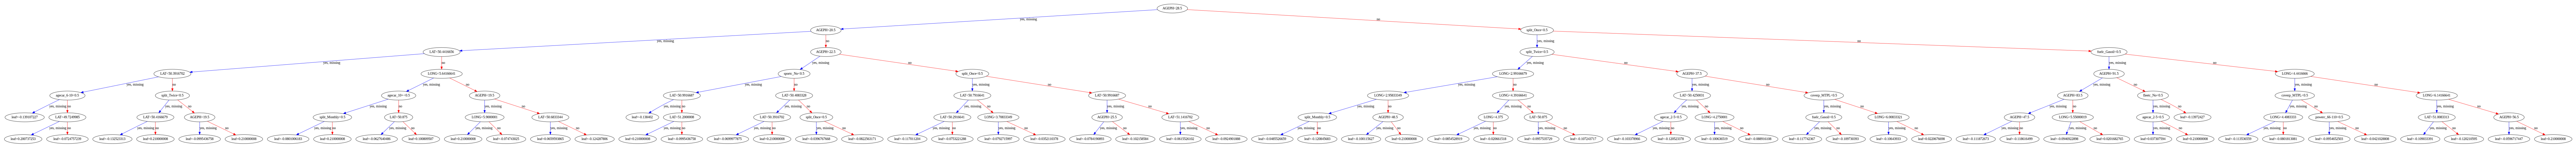

In [ ]:
fig, ax = plt.subplots(figsize=(100, 100))
xgb.plot_tree(gbm, ax= ax)
plt.show()

In [ ]:
y_pred = gbm.predict(X_test)

In [ ]:
import numpy as np
samp = X.iloc[100, :]
acc = []
acc.append(gbm.predict(pd.DataFrame(samp).transpose())[0])


[0.112356484]

Spatial Effect

In [ ]:
meannrpred = [0 for foo in shape.index]
Xsamp = X.sample(n=100)
for ishape, rowshape in shape.iterrows():
  accpr = []
  lat = shape.iloc[ishape, :]['LAT']
  longt = shape.iloc[ishape, :]['LONG']
  for index, row in Xsamp.iterrows():
    samp = X.iloc[index, :]
    samp['LAT'] = lat
    samp['LONG'] = longt
    pred = gbm.predict(pd.DataFrame(samp).transpose())[0]
    accpr.append(pred)
  meannrpred[ishape] = np.mean(accpr)
shape['meanaccpred'] = meannrpred

<ipython-input-61-fb5d3826db1d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp['LAT'] = lat
<ipython-input-61-fb5d3826db1d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp['LONG'] = longt


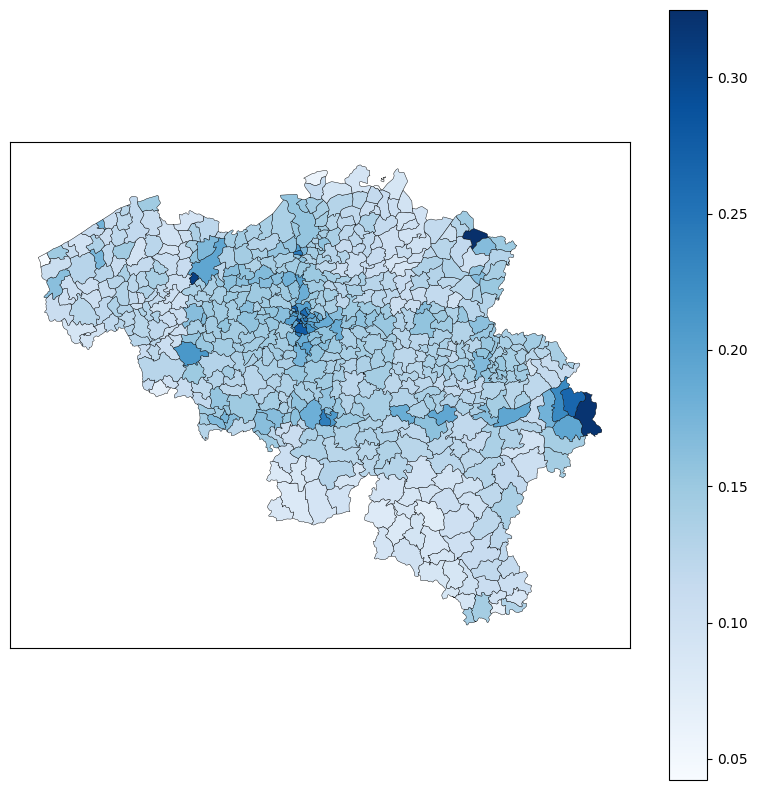

In [ ]:
#bins = [0,0.0005,0.0025,0.05]
ax = shape.plot(column='meanaccpred',
           legend = True,
           cmap = 'Blues',
           #scheme= 'quantiles',
           #classification_kwds={'bins': bins},
           #legend_kwds= {'interval': True, 'loc':'lower left', 'title':'Relative exposure', 'fontsize':'large', 'fmt':'{:.4f}'},
           edgecolor = 'black',
           linewidth = 0.3,
           figsize = (10,10))

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

We now do the same for severity data. We first remove all rows with no claims, as these cannot be used. We then do the same as before but with 'size per claim' as objective instead of number of claims.

In [ ]:
claimdata = data.dropna(subset = 'sizeperclaim')
claimdata.head()
Xsev = claimdata[features]
ysev = claimdata['sizeperclaim']
len(Xsev)
len(ysev)

18345

In [ ]:
Xsev = pd.get_dummies(Xsev)
Xsev = Xsev.rename(columns = {'agecar_>10':'agecar_10+', 'powerc_<66' : 'powerc_66-', 'powerc_>110' : 'powerc_110+'})

In [ ]:
Xsev_train, Xsev_test, ysev_train, ysev_test = train_test_split(Xsev, ysev, random_state=0)
Xsev_train

,AGEPH,LAT,LONG,agecar_0-1,agecar_2-5,agecar_6-10,agecar_10+,sexp_Female,sexp_Male,fuelc_Gasoil,...,fleetc_No,fleetc_Yes,sportc_No,sportc_Yes,coverp_MTPL,coverp_MTPL+,coverp_MTPL+++,powerc_66-110,powerc_66-,powerc_110+
128738,55,51.000000,5.200000,1,0,0,0,0,1,1,...,1,0,1,0,0,1,0,0,1,0
42444,59,50.616667,5.683333,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
68920,26,50.916667,3.200000,0,1,0,0,0,1,1,...,1,0,1,0,1,0,0,0,1,0
48494,66,50.616667,3.766667,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
24684,35,50.400000,4.316667,0,0,0,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79457,51,50.633333,5.566667,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
115642,35,50.766667,5.450000,0,0,0,1,0,1,1,...,1,0,1,0,1,0,0,0,1,0
85128,57,50.816667,4.500000,0,0,1,0,0,1,1,...,1,0,1,0,0,1,0,0,1,0
93833,37,51.000000,3.716667,0,0,0,1,0,1,1,...,1,0,1,0,1,0,0,0,1,0


We use gamma regression in our objective, since we assume the claimsize to be gamma-distributed.

In [ ]:
gbmsev = xgb.XGBRegressor(objective='reg:gamma')
gbmsev.fit(Xsev_train, ysev_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:gamma', predictor=None, ...)

<BarContainer object of 27 artists>

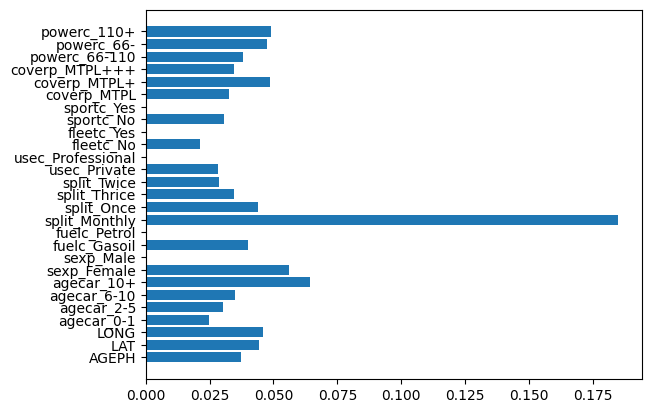

In [ ]:
featImportsev = gbmsev.feature_importances_
featNamessev = gbmsev.feature_names_in_

fig, ax = plt.subplots()

ax.barh(featNamessev, featImportsev, align='center')

Spatial Effect

In [ ]:
meansevpred = [0 for foo in shape.index]
Xsevsamp = Xsev.sample(n=100)
for ishape, rowshape in shape.iterrows():
  sevpr = []
  lat = shape.iloc[ishape, :]['LAT']
  longt = shape.iloc[ishape, :]['LONG']
  for index, row in Xsamp.iterrows():
    samp = X.iloc[index, :]
    samp['LAT'] = lat
    samp['LONG'] = longt
    pred = gbmsev.predict(pd.DataFrame(samp).transpose())[0]
    sevpr.append(pred)
  meansevpred[ishape] = np.mean(sevpr)
shape['meansevpred'] = meansevpred

<ipython-input-82-a73b75fd2fac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp['LAT'] = lat
<ipython-input-82-a73b75fd2fac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp['LONG'] = longt


In [ ]:
shape['meansevpred']

0       997.025574
1       952.454834
2       841.503845
3       690.192444
4      1023.486084
          ...     
584    1069.589355
585    1072.565186
586    1173.378662
587     888.884827
588    1285.936279
Name: meansevpred, Length: 589, dtype: float32

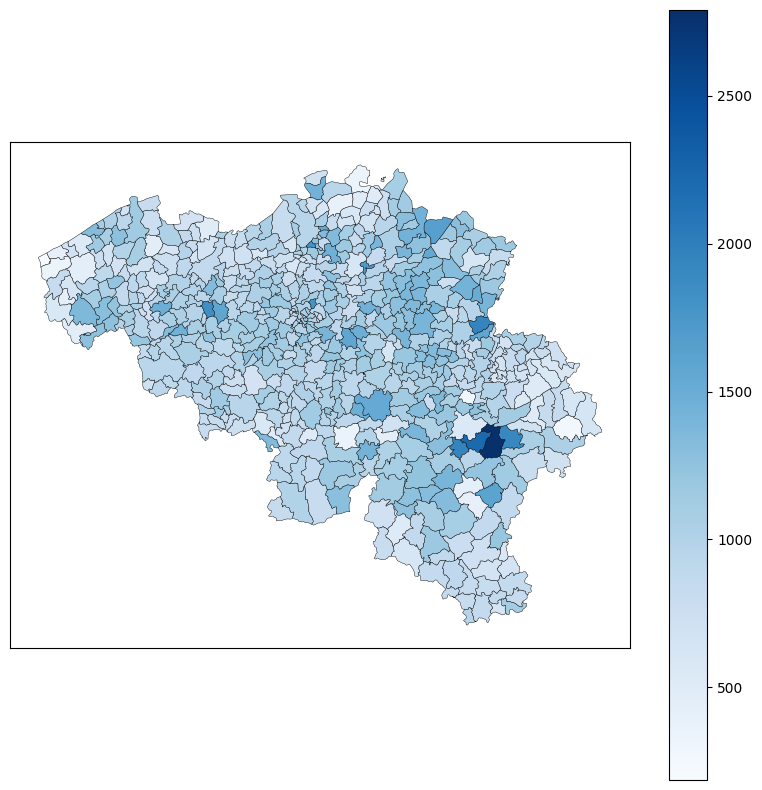

In [ ]:
#bins = [0,0.0005,0.0025,0.05]
ax = shape.plot(column='meansevpred',
           legend = True,
           cmap = 'Blues',
           #scheme= 'quantiles',
           #classification_kwds={'bins': bins},
           #legend_kwds= {'interval': True, 'loc':'lower left', 'title':'Relative exposure', 'fontsize':'large', 'fmt':'{:.4f}'},
           edgecolor = 'black',
           linewidth = 0.3,
           figsize = (10,10))

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

Denk dat het nuttig is om iets met Shapley values te doen. Ze had dat ook in de les gezegd.